# Problem 3: Kidney function.
**Creatinine clearance (Y) is an important measure of 
kidney function, but is difficult to obtain in a clinical office setting because it requires 
24-hour urine collection. To determine whether this measure can be predicted from 
some data that are easily available, a kidney specialist obtained the data that follow for 
33 male subjects. The predictor variables are serum creatinine concentration (X1), age 
(X2), and weight (X3).**
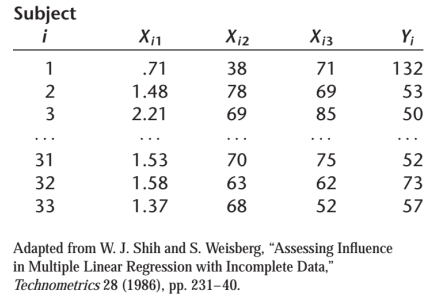

**a. Fit the multiple regression function containing the three predictor variables as first-
order terms. Obtain the variance inflation factors. Are there indications that serious 
multicollinearity problems exist here? Explain.**

**b. Obtain the residuals and plot them separately against 𝑌̂ and each of the predictor 
variables. Also prepare a normal probability plot of the residuals. Discuss.**

**c. What is added-variable plot? How is it used for? Prepare separate added-variable 
plots against e(X1|X2, X3), e(X2|X1, X3), and e(X3|X1, X2). Discuss.**


In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CH09PR15.txt', sep = '\s+', header =None, names=['Y','X1','X2','X3'])
df.head()

,Y,X1,X2,X3
0,132.0,0.71,38.0,71.0
1,53.0,1.48,78.0,69.0
2,50.0,2.21,69.0,85.0
3,82.0,1.43,70.0,100.0
4,110.0,0.68,45.0,59.0


In [3]:
x1= df['X1']
x2= df['X2']
x3= df['X3']
y= df['Y']

**a. Fit the multiple regression function containing the three predictor variables as first- order terms. Obtain the variance inflation factors. Are there indications that serious multicollinearity problems exist here? Explain.**

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('y ~ x1+x2+x3', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     56.92
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           2.88e-12
Time:                        18:22:40   Log-Likelihood:                -127.93
No. Observations:                  33   AIC:                             263.9
Df Residuals:                      29   BIC:                             269.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.0473     14.774      8.126      0.000      89.832     150.263
x1           -39.9393      5.600     -7.132      0.000     -51.393     -28.486
x2            -0.7368      0.141     -5.211      0.000      -1.026      -0.448
x3             0.7764      0.172      4.517      0.000       0.425       1.128
==============================================================================
Omnibus:                        2.889   Durbin-Watson:                   2.349
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                2.452
Skew:                          -0.658   Prob(JB):                        0.293
Kurtosis:                       2.768   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Coefficients**
* b0 = 120.0473	
* b1 = -39.9393
* b2 = -0.7368	
* b3 = 0.7764	

**Regression function:**
Y_hat = beta[0] + beta[1]*X1 + beta[2]*X2 + beta[3]*X3
#### Y_hat = 120.0473	 + (-39.9393)X1 + (-0.7368)X2 + (0.7764)X3

**The condition number is not large, 639. . This might not indicate that there are not strong multicollinearity or other numerical problems.**

**b. Obtain the residuals and plot them separately against 𝑌̂ and each of the predictor variables. Also prepare a normal probability plot of the residuals. Discuss.**

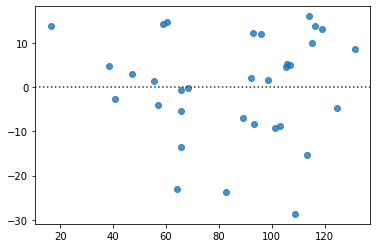

In [7]:
resid = results.resid
Y_hat = results.predict()
sns.residplot(x=Y_hat, y=resid, data=df);

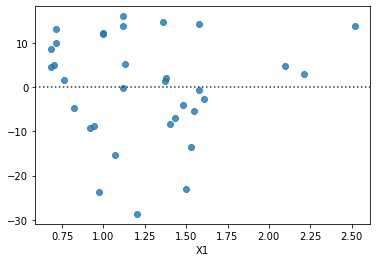

In [8]:
# x1
sns.residplot(x=x1, y=resid, data=df);

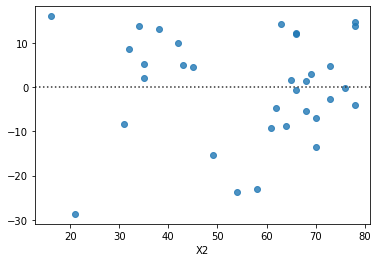

In [9]:
# x2
sns.residplot(x=x2, y=resid, data=df);

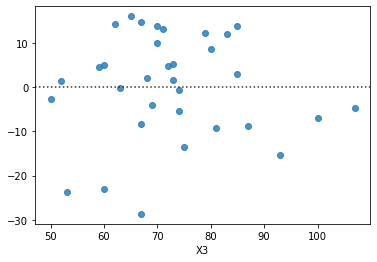

In [10]:
# x3
sns.residplot(x=x3, y=resid, data=df);

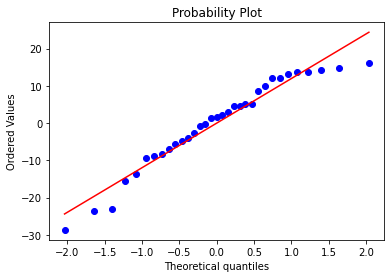

In [12]:
import scipy.stats as stats
stats.probplot(resid, dist="norm", plot = plt);
plt.show();

 There is a slight increase in variability for ei vs. Y_hat, but overall it looks okay. The normal probability plot of the residuals looks fine (relatively straight). The plots of the residuals vs. each predictor all look appropriately “random.”

**c. What is added-variable plot? How is it used for? Prepare separate added-variable plots against e(X1|X2, X3), e(X2|X1, X3), and e(X3|X1, X2). Discuss.**

***“Added-variable plots” (also called “partial regression
plots” or “adjusted variable plots”) are refined residual
plots that provide graphic information about the marginal
importance of a predictor variable given the other variables
already in the model.***

***In an added-variable plot, both the response variable Y
and the predictor variable under investigation (say, X1)
are both regressed against the other predictor
variables already in the regression model and the
residuals are obtained for each. These two sets of
residuals reflect the part of each (Y and X1) that is not
linearly associated with the other predictor variables.***

eval_env: 1
eval_env: 1
eval_env: 1


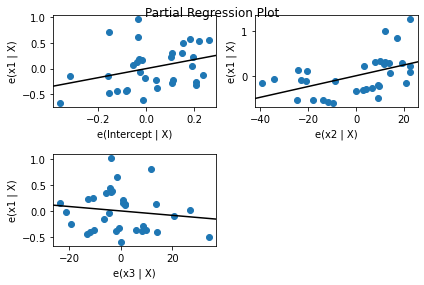

In [26]:
model = smf.ols('x1 ~ x2+x3', data=df)
results = model.fit()
fig = sm.graphics.plot_partregress_grid(results)

eval_env: 1
eval_env: 1
eval_env: 1


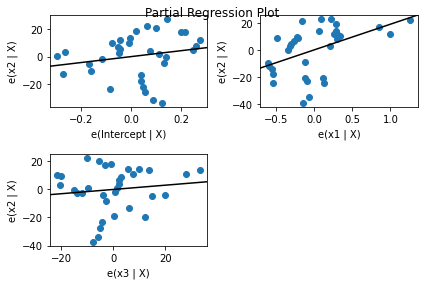

In [27]:
model = smf.ols('x2 ~ x1+x3', data=df)
results = model.fit()
fig = sm.graphics.plot_partregress_grid(results)

eval_env: 1
eval_env: 1
eval_env: 1


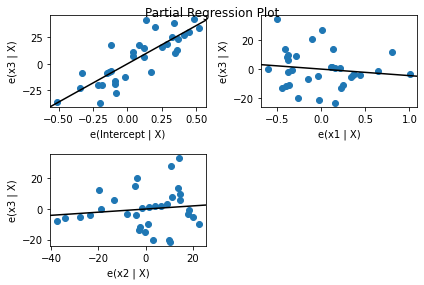

In [28]:
model = smf.ols('x3 ~ x1+x2', data=df)
results = model.fit()
fig = sm.graphics.plot_partregress_grid(results)